# Skew

In this notebook we compare the skew in the imbalance of the classes to compare how much class imbalance impacts the active learning curve.

In [1]:
## Imports ##

# numpy
import numpy as np

# matplotlib
import matplotlib as mlp
import matplotlib.pyplot as plt

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# skactiveml
from skactiveml.classifier import SklearnClassifier
from skactiveml.pool import UncertaintySampling
from skactiveml.utils import MISSING_LABEL

# plot function
from plot_accuracy import plot_accuracy

# balanced accuracy
from balanced_accuracy import balanced_accuracy

# set warnings
import warnings
mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

We will use 2 good classifiers for testing purposes, LogisticRegression and the MLPClassifier.

In [2]:
def get_accuracy(classifier, weights=None, cycles=30, n_samples=400, **kwargs):
    data = []
    for rand in range(100):
        qs = UncertaintySampling(random_state=rand, **kwargs)
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, weights=weights, random_state=rand)
        Xf, Xt, yf, yt = train_test_split(X, y, random_state=rand)
        y = np.full(shape=yf.shape, fill_value=MISSING_LABEL)
        out = []
        clf = SklearnClassifier(classifier, classes=np.unique(yf))

        clf.fit(Xf, y)
        for _ in range(cycles):
            i = qs.query(Xf, y, clf)
            y[i] = yf[i]
            clf.fit(Xf,y)
            y_predicted = clf.predict(Xt)
            out.append(balanced_accuracy(yt, y_predicted))
        data.append(out)
    return np.mean(np.array(data), axis=0)

In [3]:
acc_logistic_0 = get_accuracy(LogisticRegression(), weights=[0.5, 0.5])

In [4]:
acc_logistic_1 = get_accuracy(LogisticRegression(), weights=[0.6, 0.4])

In [5]:
acc_logistic_2 = get_accuracy(LogisticRegression(), weights=[0.7, 0.3])

In [6]:
acc_logistic_3 = get_accuracy(LogisticRegression(), weights=[0.8, 0.2])

In [7]:
acc_logistic_4 = get_accuracy(LogisticRegression(), weights=[0.9, 0.1])

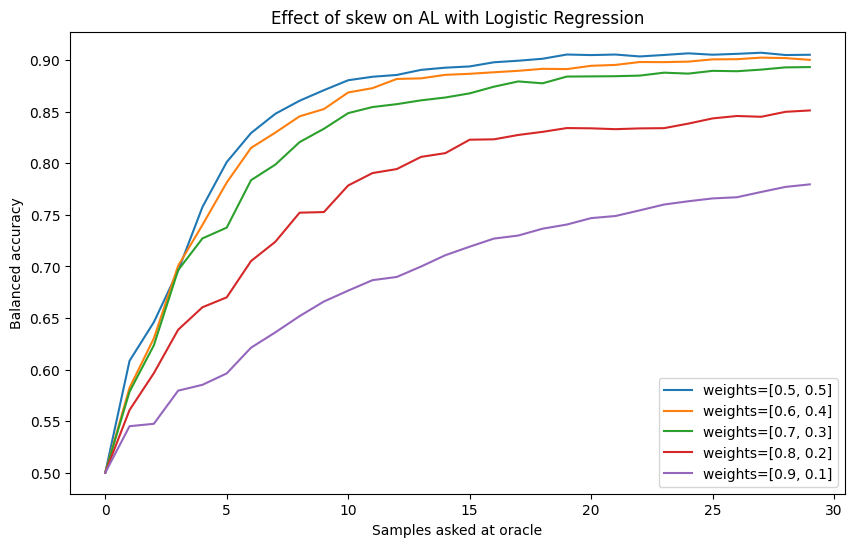

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

plot_accuracy('Effect of skew on AL with Logistic Regression',
              [[acc_logistic_0, "weights=[0.5, 0.5]"],
               [acc_logistic_1, "weights=[0.6, 0.4]"],
               [acc_logistic_2, "weights=[0.7, 0.3]"],
               [acc_logistic_3, "weights=[0.8, 0.2]"],
               [acc_logistic_4, "weights=[0.9, 0.1]"]
              ], axs)

fig.show()

We can observe that the results get exponentially worse with a bigger skew in the imbalance.

In [9]:
acc_neural_0 = get_accuracy(MLPClassifier(), weights=[0.5, 0.5])

In [10]:
acc_neural_1 = get_accuracy(MLPClassifier(), weights=[0.6, 0.4])

In [11]:
acc_neural_2 = get_accuracy(MLPClassifier(), weights=[0.7, 0.3])

In [12]:
acc_neural_3 = get_accuracy(MLPClassifier(), weights=[0.8, 0.2])

In [13]:
acc_neural_4 = get_accuracy(MLPClassifier(), weights=[0.9, 0.1])

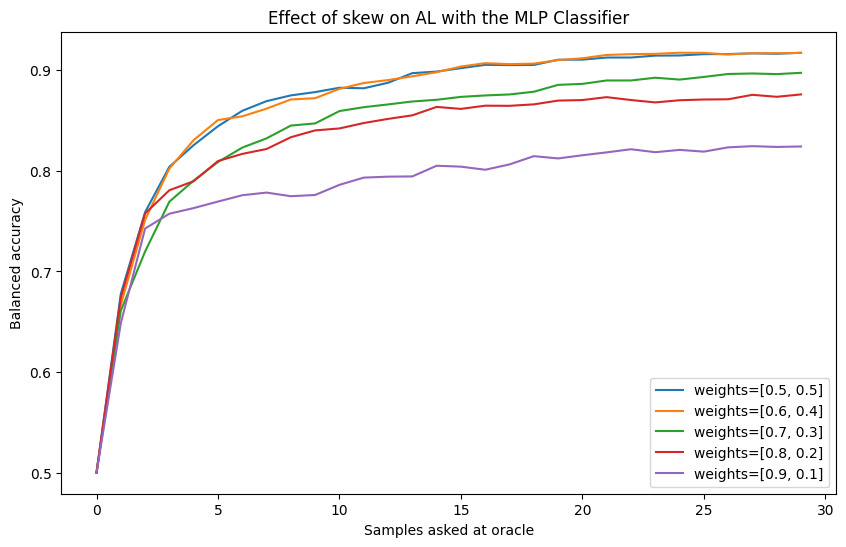

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

plot_accuracy('Effect of skew on AL with the MLP Classifier',
              [[acc_neural_0, "weights=[0.5, 0.5]"],
               [acc_neural_1, "weights=[0.6, 0.4]"],
               [acc_neural_2, "weights=[0.7, 0.3]"],
               [acc_neural_3, "weights=[0.8, 0.2]"],
               [acc_neural_4, "weights=[0.9, 0.1]"]
              ], axs)

fig.show()